#  Compute Label tine course using SVD

In [1]:
import pycartool as cart
import numpy as np
import matplotlib.pyplot as plt

### Import Inverse solution files  from Cartool

In [2]:
fname_spi = 'MNI152.NlinAsym09c.204.5000.2017.spi'
fname_roi = 'MNI152.NlinAsym09c.204.5000.2017.AAL.rois'

spi = cart.source_space.read_spi(fname_spi)
roi = cart.regions_of_interest.read_roi(fname_roi, spi)

RO01
Dimension_of_original_data: 5004
Number of ROI: 114


### Define constants

In [3]:
sfreq = 512
n_sources = len(spi.names)
snr = 10
n_times = 2048

### Generate data

#### Create random noise

In [4]:
simulated_tc = np.random.normal(size=(n_sources, 3, n_times))

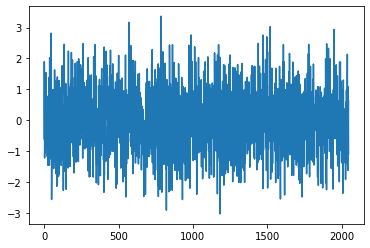

In [5]:
plt.figure()
plt.plot(simulated_tc[0,0])
plt.show()

#### Create sin wave in Roi

In [6]:
x = np.arange(0,n_times,1)
sin = np.sin(x/(2 * np.pi))

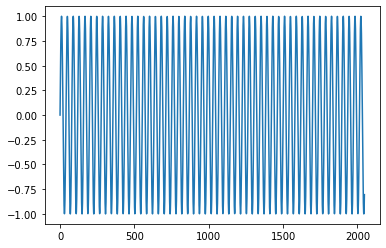

In [7]:
plt.figure()
plt.plot(sin)
plt.show()

In [8]:
for elem in roi.groups_of_indexes[0]:
    simulated_tc[elem][0] = snr * sin
    simulated_tc[elem][1] = np.zeros(sin.shape)
    simulated_tc[elem][2] = np.zeros(sin.shape)

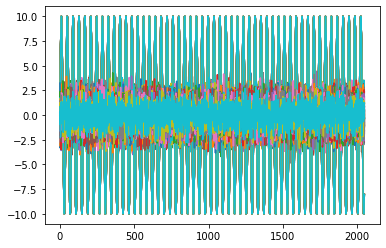

In [9]:
plt.figure()
plt.plot(simulated_tc[300:500,0,:].T)
plt.show()

In [10]:
source_estimate_simulated = cart.source_estimate.SourceEstimate(simulated_tc, sfreq=sfreq, source_space=spi)
roi_t_simulated = source_estimate_simulated.compute_rois_tc(roi)

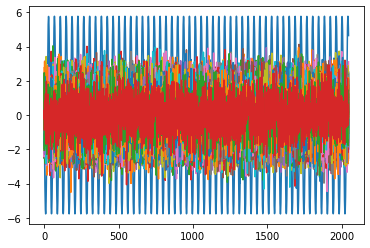

In [11]:
plt.figure()
plt.plot(roi_t_simulated.sources_tc[:,0,:].T)
plt.show()